# Figure 2
Assuming operation on google colab

In [ ]:
# prepare environment
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# prepare environment
!pip install pycombat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# prepare environment
base_dir = "/content/drive/{YOUR PATH}"

import os
os.chdir(base_dir)

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

from src import difference as diff

In [ ]:
# fxn for figure 2
def prep_data(batch1, data1, batch2, data2, output, condition):
    """ prepare data for figure 2 """
    res2 = diff.to_response(
            'madz', data2, batch2, key_compound='cmap_name',
            vehicle_control=False, control_names=['DMSO', 'medium'], drop_control=False,
            intra_batch=False, key_batch='batch_id', spearman=False, out_dir=output, name='large'
    )
    results = []
    negatives = []
    for c in condition:
        res0 = diff.to_response(
            'madz',data1,batch1,key_compound='cmap_name',
            vehicle_control=c[1],control_names=['DMSO','medium'],drop_control=False,
            intra_batch=c[2],key_batch='batch_id',spearman=False,out_dir=output,name=c[0].replace(' ','_')
        )
        res0 = res0.replace([np.inf,-np.inf],np.nan)
        res0 = res0.dropna()
        temp = res2.copy().dropna()
        r,n = diff.inter_dc(temp,res0,output + '/{}.csv'.format(c[0].replace(' ','_')))
        r.loc[:,'condition'] = [c[0]] * r.shape[0]
        n = n.values.ravel()
        results.append(r)
        negatives.append(n)
    result = pd.concat(results,axis=0,join='inner')
    negative = np.concatenate(negatives)
    return result,negative,results,negatives


def plot_ks(condition,out_ks,result,negative,results,negatives):
    """ plot data for figure 2 """
    n_sample = len(condition)
    fig,axes = plt.subplots(n_sample,1,squeeze=False,tight_layout=True,figsize=(6,3*n_sample))
    plt.rcParams['font.size'] = 14
    ks_res = []
    imax = np.max(result['interDC'])
    imin = np.min(result['interDC'])
    nmax = np.max(negative)
    nmin = np.min(negative)
    vmax = np.max([imax,nmax])
    vmin = np.min([imin,nmin])
    idx = []
    count = 0
    for r,n,t in zip(results,negatives,condition):
        b = r['interDC'].values.ravel()
        sns.distplot(n,ax=axes[count,0],hist=False,label='null',color='grey')
        sns.distplot(b,ax=axes[count,0],hist=False,label='interDC',color='royalblue')
        axes[count,0].set_title(t[0])
        axes[count,0].spines['top'].set_visible(False)
        axes[count,0].spines['right'].set_visible(False)
        axes[count,0].set_xlim((vmin - np.abs(vmax) * 0.1,vmax + np.abs(vmax) * 0.1))
        ks_res.append(stats.ks_2samp(n,b))
        count += 1
        idx.append(t[0])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    ks_res2 = pd.DataFrame(ks_res,index=idx)
    ks_res2.to_csv(out_ks)


def main(batch1,data1,batch2,data2,output,out_ks,condition):
    """ runner for figure 2 """
    result,negative,results,negatives = prep_data(batch1,data1,batch2,data2,output,condition)
    plot_ks(condition,out_ks,result,negative,results,negatives)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

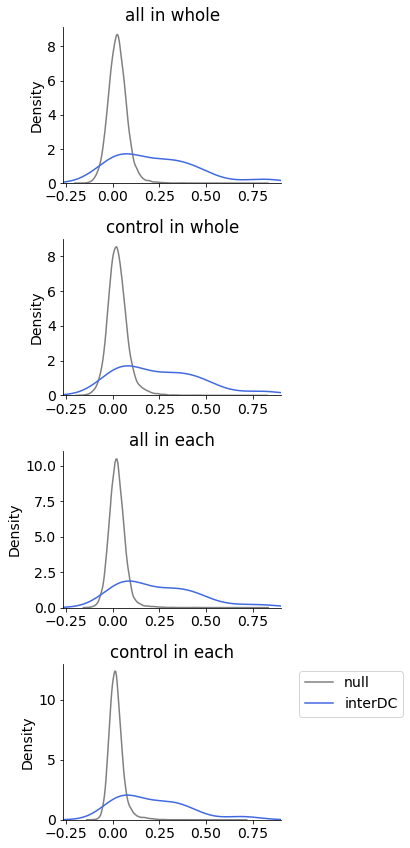

In [ ]:
# Figure 2
# use HT-HG-U133A and HT-HG-U133A_EA dataset and compare the following conditions:
# - no batch correction (+), normalized by all samples in whole dataset
# - no batch correction (+), normalized by control samples in whole dataset
# - no batch correction (+), normalized by all samples in each batch
# - no batch correction (+), normalized by control samples in each batch

# config
batch1 = pd.read_csv(base_dir + "/data/batch_HT-HG-U133A_EA_selected.txt", sep='\t', index_col=0)
data1 = pd.read_pickle(base_dir + "/data/HTHGU133AEA_done_noBC_qn.pkl")
batch2 = pd.read_csv(base_dir + "/data/batch_HT-HG-U133A_selected.txt", sep='\t', index_col=0)
data2 = pd.read_pickle(base_dir + "/data/HTHGU133A_done_noBC_qn.pkl")

output = base_dir + "/output/Fig2"
out_ks = base_dir + "/output/Fig2/ks_res_noBC.csv"

condition = [
    ('all in whole',False,False),
    ('control in whole',True,False),
    ('all in each',False,True),
    ('control in each',True,True)
    ]

# run
main(batch1,data1,batch2,data2,output,out_ks,condition)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

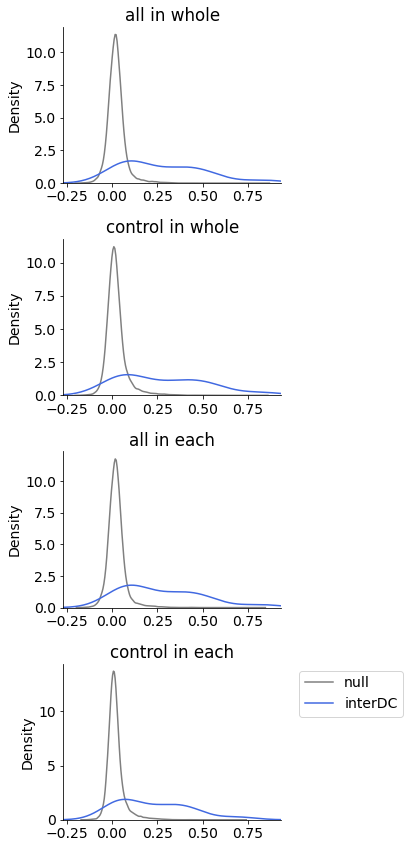

In [ ]:
# Figure 2
# use HT-HG-U133A and HT-HG-U133A_EA dataset and compare the following conditions:
# - batch correction (+), normalized by all samples in whole dataset
# - batch correction (+), normalized by control samples in whole dataset
# - batch correction (+), normalized by all samples in each batch
# - batch correction (+), normalized by control samples in each batch

# config
batch1 = pd.read_csv(base_dir + "/data/batch_HT-HG-U133A_EA_selected.txt", sep='\t', index_col=0)
data1 = pd.read_pickle(base_dir + "/data/HTHGU133AEA_done_qn.pkl")
batch2 = pd.read_csv(base_dir + "/data/batch_HT-HG-U133A_selected.txt", sep='\t', index_col=0)
data2 = pd.read_pickle(base_dir + "/data/HTHGU133A_done_qn.pkl")

output = base_dir + "/output/Fig2"
out_ks = base_dir + "/output/Fig2/ks_res.csv"

condition = [
    ('all in whole',False,False),
    ('control in whole',True,False),
    ('all in each',False,True),
    ('control in each',True,True)
    ]

# run
main(batch1,data1,batch2,data2,output,out_ks,condition)

# for cartoon

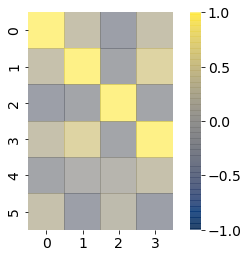

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

array = np.array([
    [1.0,0.3,-0.3,0.3],
    [0.3,1.0,-0.2,0.6],
    [-0.3,-0.2,1.0,-0.2],
    [0.3,0.6,-0.2,1.0],
    [-0.2,0.0,0.1,0.3],
    [0.3,-0.3,0.2,-0.3]
])

plt.figure()
sns.heatmap(array,square=True,cmap="cividis",alpha=0.6,vmin=-1.0,vmax=1.0)
plt.show()